## Feature Engineering and Visualisation on Delhi Climate Dataset from Kaggle

Dataset: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data

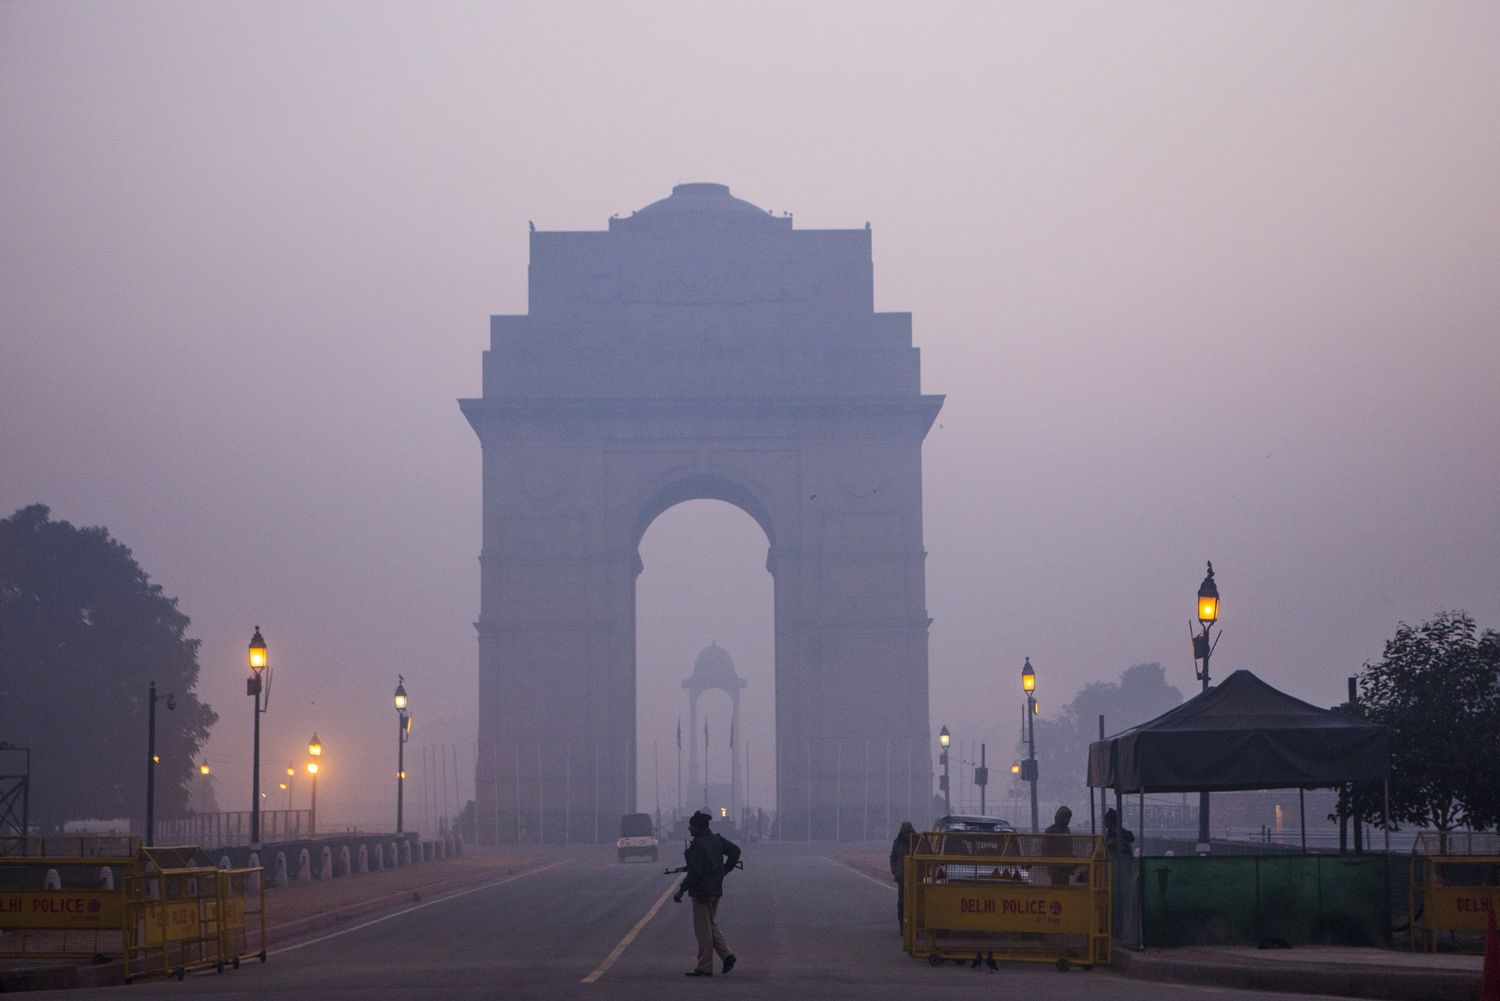

Before jumping into the proccess I would like to tell you about the changes I made in the dataset



1.   The Original Data set contained 4 columns along with date namely: meantemp, humidity, wind_speed and mean_pressure
2.   For the purpose of this assignment, I converted this dataset into univariate hence kept meantemp and removed other columns
3.  Peformed those changes in Excel



In [1]:
# importting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

In [27]:
# reading the data into pandas dataframe
delhi = pd.read_csv("D:\College\Academics\SEM 3\Time Series Analysis\Dataset\delhiclimate\DelhiClimateMeanTemp.csv"
                    ,header = 0, index_col = 0,
                    parse_dates = True)

# Exploring the dataset

In [29]:
delhi.head()

,meantemp
date,
01-01-2013,10.000000
02-01-2013,7.400000
03-01-2013,7.166667
04-01-2013,8.666667
05-01-2013,6.000000


In [82]:
# converting index to datetime for date time feature engineering
delhi.index = pd.to_datetime(delhi.index, format="%d-%m-%Y")

In [83]:
delhi.tail()

date
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Name: meantemp, dtype: float64

In [84]:
delhi = delhi.squeeze()

In [85]:
delhi.describe()

count    1462.000000
mean       25.495521
std         7.348103
min         6.000000
25%        18.857143
50%        27.714286
75%        31.305804
max        38.714286
Name: meantemp, dtype: float64

## Visualizing the data

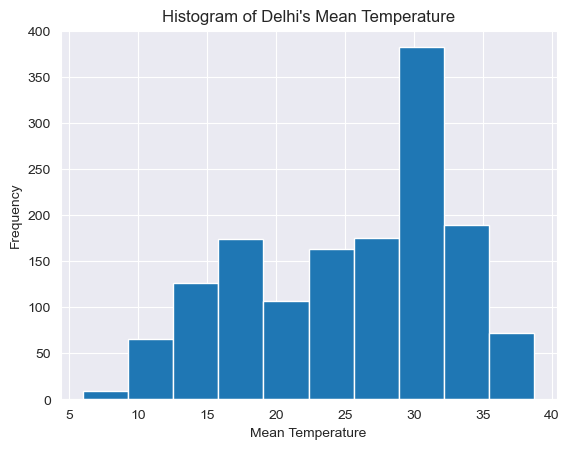

In [86]:
# creating a histogram
delhi.hist()
plt.title("Histogram of Delhi's Mean Temperature")
plt.xlabel("Mean Temperature")
plt.ylabel("Frequency")
plt.show()

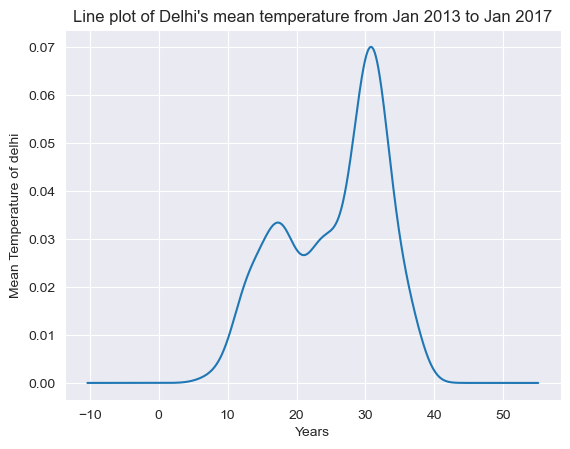

In [89]:
# creating line plot
delhi.plot(kind = 'kde');
plt.xlabel("Years")
plt.ylabel("Mean Temperature of delhi")
plt.title("Line plot of Delhi's mean temperature from Jan 2013 to Jan 2017");
plt.show()

**Inference:** We can see the distribution of datapoint and we can infer that the data is `left skewed` and it isn't normally distributed

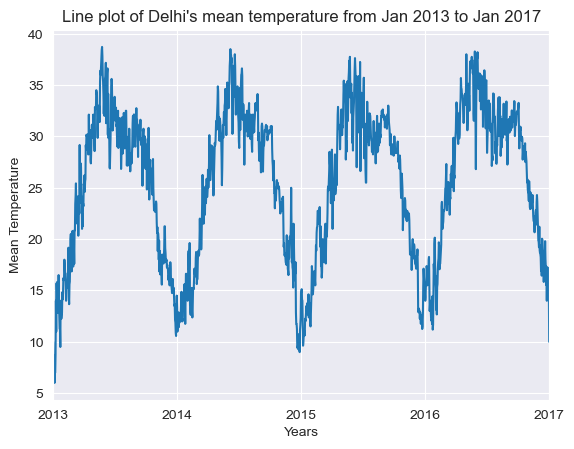

In [87]:
# creating line plot
delhi.plot();
plt.xlabel("Years")
plt.ylabel("Mean Temperature")
plt.title("Line plot of Delhi's mean temperature from Jan 2013 to Jan 2017");
plt.show()

**Inference:** By just looking at this visual


*   we cannot see a clear trend as the data it is oscillating around the level
*   we can see seasonality from in yearly intervals eg: from `01-2013` to `01-2014`



**Inference:** In this visual, you can once again see the distribution of the data points but in a much smoother form

- After looking at the data distribution, we know that the data is left skewed
- Data has it's peak around roughly `30-35`

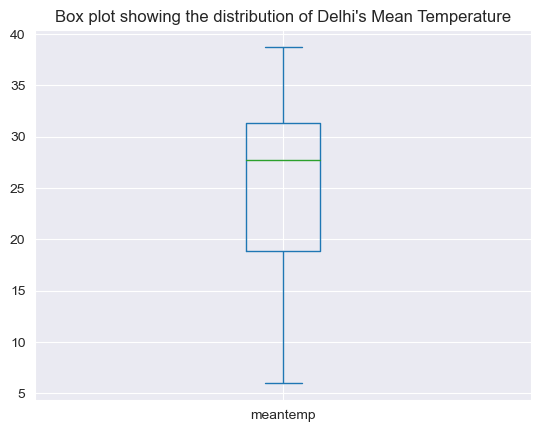

In [88]:
# creating box plot
delhi.plot(kind = 'box');
plt.title("Box plot showing the distribution of Delhi's Mean Temperature")
plt.show()

**Inference:**
- We can see that the median is towards the 3st Quartile that means the there are more data between the 1rd Quartile and the median
- We do not have any outliers in the dataset

In [73]:
# creating dataset with only 2013 records
delhi2013 = delhi['2013']

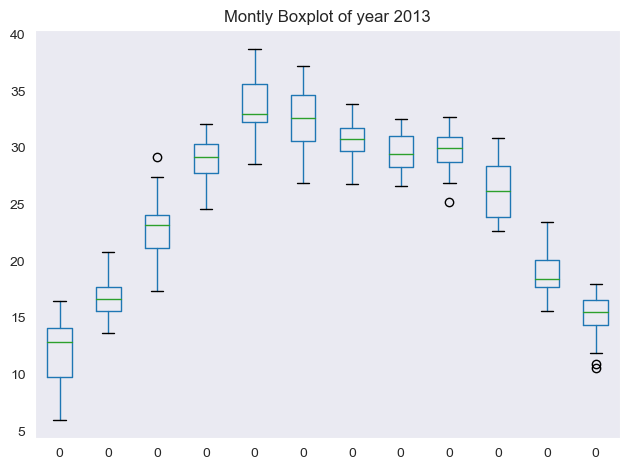

In [74]:
# creating a grouped boxplot of the year 2013 on basis of month
groups = delhi2013.groupby(pd.Grouper(freq="M"))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups],axis=1)
monthscolummns=range(1,13)
months.boxplot(grid=False)
plt.title("Montly Boxplot of year 2013")
plt.tight_layout()
plt.show()

**Inference:** 
- There are a few outlier on the upper fence of `March 2013`
- There are a few outlier on the lower fence of `September 2013` and `December 2013`

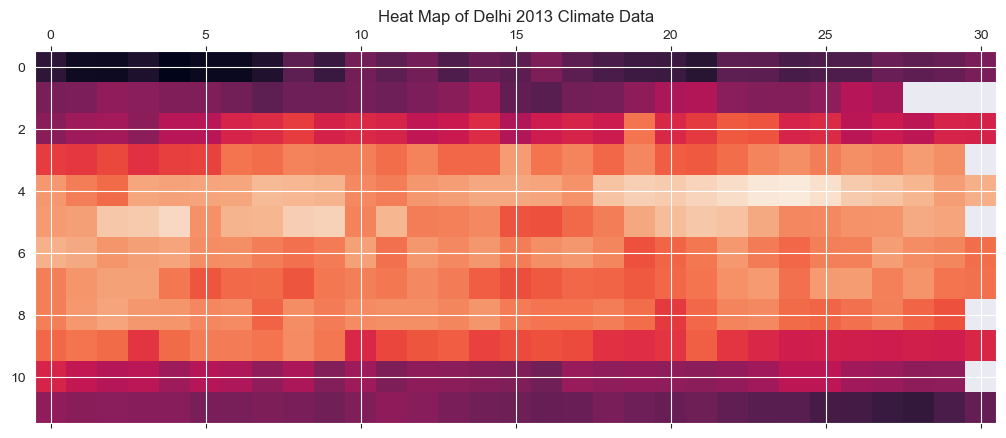

In [81]:
# heatmap plot
plt.matshow(months.T, interpolation = None,aspect = "auto")
plt.title("Heat Map of Delhi 2013 Climate Data")
plt.show()

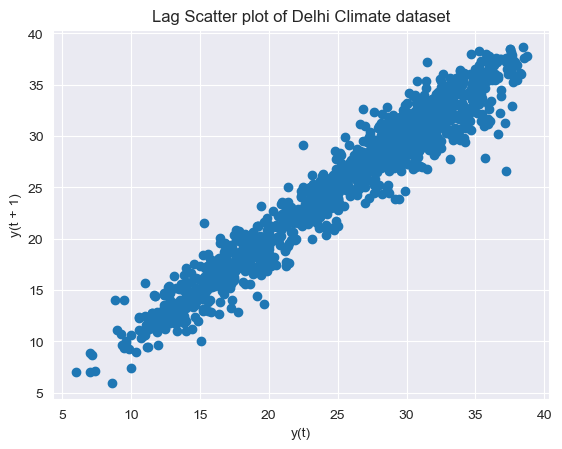

In [40]:
# Lag scatter plot
from pandas.plotting import lag_plot
lag_plot(delhi);
plt.title("Lag Scatter plot of Delhi Climate dataset")
plt.show()

**Inference:**
- This plot shows `positive linear` trend
- positive linear trend in lagged plot means there is a `positive autocorrelation`

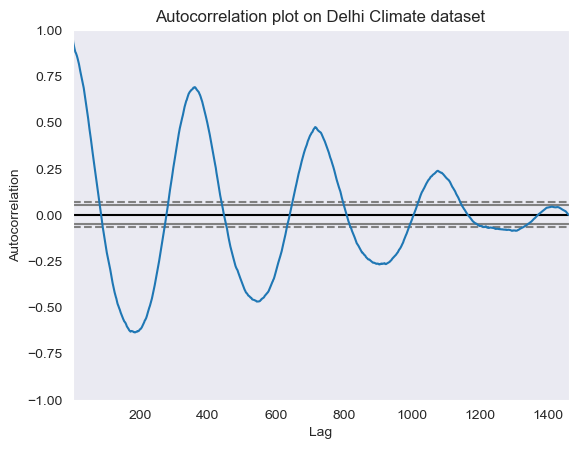

In [41]:
#Autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(delhi)
plt.title("Autocorrelation plot on Delhi Climate dataset")
plt.show();

**Inference:** 
- We can see the intital few lags provide the best correlation
- As the lag increases the correlation shows a negative order of growth

# Feature Engineering

## DateTime Features

In [42]:
#importing date time
import datetime

In [45]:
# Creating duplicate dataframe for feature engineering
dummy_df = pd.DataFrame(delhi)
(dummy_df.shape)

(1462, 1)

In [46]:
# creating day related datetime features
dummy_df["DayOfMonth"] = dummy_df.index.day
dummy_df["DayOfWeek"] = dummy_df.index.day_of_week
dummy_df["DayOfYear"] = dummy_df.index.day_of_year
display(dummy_df.shape)

(1462, 4)

In [47]:
# checking the dataset
dummy_df.head()

,meantemp,DayOfMonth,DayOfWeek,DayOfYear
date,,,,
2013-01-01,10.000000,1,1,1
2013-01-02,7.400000,2,2,2
2013-01-03,7.166667,3,3,3
2013-01-04,8.666667,4,4,4
2013-01-05,6.000000,5,5,5


In [48]:
# creating month related datetime feature
dummy_df["Month"] = dummy_df.index.month
dummy_df["IsMonthStart"] = dummy_df.index.is_month_start
dummy_df["IsMonthEnd"] = dummy_df.index.is_month_end
dummy_df["DaysInMonth"] = dummy_df.index.days_in_month
display(dummy_df.shape)

(1462, 8)

In [49]:
# checking the dataset
dummy_df.head()

,meantemp,DayOfMonth,DayOfWeek,DayOfYear,Month,IsMonthStart,IsMonthEnd,DaysInMonth
date,,,,,,,,
2013-01-01,10.000000,1,1,1,1,True,False,31
2013-01-02,7.400000,2,2,2,1,False,False,31
2013-01-03,7.166667,3,3,3,1,False,False,31
2013-01-04,8.666667,4,4,4,1,False,False,31
2013-01-05,6.000000,5,5,5,1,False,False,31


In [58]:
# creating week related datetime features
dummy_df["Week"] = dummy_df.index.isocalendar().week
#dummy_df["Weekday"] = dummy_df.index.isocalendar().weekday

# Display the shape of the DataFrame
print(dummy_df.shape)

(1462, 9)


In [59]:
# checking the dataset
dummy_df.head()

,meantemp,DayOfMonth,DayOfWeek,DayOfYear,Month,IsMonthStart,IsMonthEnd,DaysInMonth,Week
date,,,,,,,,,
2013-01-01,10.000000,1,1,1,1,True,False,31,1
2013-01-02,7.400000,2,2,2,1,False,False,31,1
2013-01-03,7.166667,3,3,3,1,False,False,31,1
2013-01-04,8.666667,4,4,4,1,False,False,31,1
2013-01-05,6.000000,5,5,5,1,False,False,31,1


## Lagged Features

In [60]:
# creating 3 lagged features
dummy_df["Lag1"] = dummy_df["meantemp"].shift(1)
dummy_df["Lag2"] = dummy_df["meantemp"].shift(2)
dummy_df["Lag3"] = dummy_df["meantemp"].shift(3)
dummy_df["Lag4"] = dummy_df["meantemp"].shift(4)
dummy_df["Lag5"] = dummy_df["meantemp"].shift(5)
display(dummy_df.shape)

(1462, 14)

In [61]:
#checking the dataset
dummy_df.head()

,meantemp,DayOfMonth,DayOfWeek,DayOfYear,Month,IsMonthStart,IsMonthEnd,DaysInMonth,Week,Lag1,Lag2,Lag3,Lag4,Lag5
date,,,,,,,,,,,,,,
2013-01-01,10.000000,1,1,1,1,True,False,31,1,NaN,NaN,NaN,NaN,NaN
2013-01-02,7.400000,2,2,2,1,False,False,31,1,10.000000,NaN,NaN,NaN,NaN
2013-01-03,7.166667,3,3,3,1,False,False,31,1,7.400000,10.000000,NaN,NaN,NaN
2013-01-04,8.666667,4,4,4,1,False,False,31,1,7.166667,7.400000,10.0,NaN,NaN
2013-01-05,6.000000,5,5,5,1,False,False,31,1,8.666667,7.166667,7.4,10.0,NaN


## Window Features

In [62]:
# rolling mean
dummy_df["MA_5"] = dummy_df["meantemp"].rolling(5).mean()
dummy_df["MA_10"] = dummy_df["meantemp"].rolling(10).mean()
dummy_df["MA_15"] = dummy_df["meantemp"].rolling(15).mean()

# expanding mean
dummy_df["ExpandingMean"] = dummy_df["meantemp"].expanding().mean()
dummy_df.shape

(1462, 18)

In [63]:
# checking the dataset
dummy_df.head()

,meantemp,DayOfMonth,DayOfWeek,DayOfYear,Month,IsMonthStart,IsMonthEnd,DaysInMonth,Week,Lag1,Lag2,Lag3,Lag4,Lag5,MA_5,MA_10,MA_15,ExpandingMean
date,,,,,,,,,,,,,,,,,,
2013-01-01,10.000000,1,1,1,1,True,False,31,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
2013-01-02,7.400000,2,2,2,1,False,False,31,1,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.700000
2013-01-03,7.166667,3,3,3,1,False,False,31,1,7.400000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.188889
2013-01-04,8.666667,4,4,4,1,False,False,31,1,7.166667,7.400000,10.0,NaN,NaN,NaN,NaN,NaN,8.308333
2013-01-05,6.000000,5,5,5,1,False,False,31,1,8.666667,7.166667,7.4,10.0,NaN,7.846667,NaN,NaN,7.846667


# Thank You
Author: Asif Sayyed